In [25]:
from environments.takeaway import utils as twy
from environments.takeaway.co_aa_takeaway import COAATakeaway
from argumentation.utils import construct_all_attacks, order_to_matrix
from argumentation.classes import ArgumentationFramework
from agents.co_aa_agent import COAAAgent
from utils import run_episode

import subprocess
import socket
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from tqdm.notebook import tqdm

In [26]:
def get_host(mode: str = 'recv', path = r"\\wsl$\Ubuntu-16.04\run\systemd\resolve\resolv.conf"):
    if mode == 'send':
        batcmd="wsl hostname -I"
        result = subprocess.check_output(batcmd, shell=True)
        return result.decode("utf-8").strip()
    else:
        f = open(path)
        for line in f:
            li=line.strip()
            if not li.startswith("#"):
                if line.rstrip().split(' ')[0] == 'nameserver':
                    return line.rstrip().split(' ')[1]                    

In [27]:
arg_actions = twy.arg_actions
args = list(arg_actions.keys())
# atts = construct_all_attacks(arg_actions)
# af = ArgumentationFramework(args, atts)

In [28]:
epsilon = 0.1
gamma = 0.99
alpha = 1e-3
lambd = 0.8
agent = COAAAgent(alpha, gamma, epsilon, args, lambd)
ordering_path = r"\\wsl$\Ubuntu-16.04\home\candido\robocup\ORLA\ordering.txt"
send_host = get_host('send')
send_port = 7000
recv_host = get_host('recv')
recv_port = 7001


In [29]:
# state = order_to_matrix([], args, True)

# agent.w[state,args.index('TackleBall1')] = -1
# agent.w[state,args.index('TackleBall2')] = -1
# agent.w[state,args.index('TackleBall3')] = -1

# agent.w[state,args.index('MinAngle1,2')] = -2
# agent.w[state,args.index('MinAngle1,3')] = -2
# agent.w[state,args.index('MinAngle1,4')] = -2
# agent.w[state,args.index('MinAngle2,2')] = -2
# agent.w[state,args.index('MinAngle2,3')] = -2
# agent.w[state,args.index('MinAngle2,4')] = -2
# agent.w[state,args.index('MinAngle3,2')] = -2
# agent.w[state,args.index('MinAngle3,3')] = -2
# agent.w[state,args.index('MinAngle3,4')] = -2

# agent.w[state,args.index('MinDist1,2')] = -2
# agent.w[state,args.index('MinDist1,3')] = -2
# agent.w[state,args.index('MinDist1,4')] = -2
# agent.w[state,args.index('MinDist2,2')] = -2
# agent.w[state,args.index('MinDist2,3')] = -2
# agent.w[state,args.index('MinDist2,4')] = -2
# agent.w[state,args.index('MinDist3,2')] = -2
# agent.w[state,args.index('MinDist3,3')] = -2
# agent.w[state,args.index('MinDist3,4')] = -2

# agent.w[state,args.index('OpenKeeper1,3')] = -3
# agent.w[state,args.index('OpenKeeper1,2')] = -3
# agent.w[state,args.index('OpenKeeper1,4')] = -3
# agent.w[state,args.index('OpenKeeper2,2')] = -3
# agent.w[state,args.index('OpenKeeper2,3')] = -3
# agent.w[state,args.index('OpenKeeper2,4')] = -3
# agent.w[state,args.index('OpenKeeper3,2')] = -3
# agent.w[state,args.index('OpenKeeper3,3')] = -3
# agent.w[state,args.index('OpenKeeper3,4')] = -3

# agent.w[state,args.index('FarKeeper1,2')] = -4
# agent.w[state,args.index('FarKeeper1,3')] = -4
# agent.w[state,args.index('FarKeeper1,4')] = -4
# agent.w[state,args.index('FarKeeper2,2')] = -4
# agent.w[state,args.index('FarKeeper2,3')] = -4
# agent.w[state,args.index('FarKeeper2,4')] = -4
# agent.w[state,args.index('FarKeeper3,2')] = -4
# agent.w[state,args.index('FarKeeper3,3')] = -4
# agent.w[state,args.index('FarKeeper3,4')] = -4

# agent.w *= 1e-3

In [30]:
# agent.value(state, args.index('MinAngle1,3'))
# agent.value(
#     order_to_matrix(['TackleBall1', 'TackleBall2', 'TackleBall3', 'MinAngle2,3'], args, True),
#     args.index('MinAngle2,3'))

# agent.order

# agent.w[state,args.index('MinDist1,2')]

In [33]:
agent.epsilon = 0.05
agent.gamma = 1
agent.alpha = 8e-7
agent.lambd = 1

min_epsilon = 0.05
min_alpha = 1e-6

decay = 0e-4

rewards = []


env = COAATakeaway(
    args,   
    send_host,
    send_port,
    recv_host,
    recv_port,
    ordering_path
)

t_episodes = tqdm(range(1, int(1e6)+1))
for episode in t_episodes:
    start_state = env.reset()
    agent.reset_traces()
    agent.alpha = np.max([agent.alpha*(1-decay), min_alpha])
    agent.epsilon = np.max([agent.epsilon*(1-decay), min_epsilon])
    end_state, reward, animation_data = run_episode(env, agent, start_state, is_learning=True, is_animating=False, is_rendering=False)
    rewards.append(reward)
    t_episodes.set_postfix({'avg': np.average(rewards[-200:]), 'last': rewards[-1]})
    # t_episodes.set_postfix({'avg': np.average(rewards), 'last': rewards[-1]})



  0%|          | 0/1000000 [00:00<?, ?it/s]

Start sent
  Reward: -166.0
Start sent
  Reward: -126.0
Start sent
  Reward: -70.0
Start sent
  Reward: -92.0
Start sent
  Reward: -129.0
Start sent
  Reward: -45.0
Start sent
  Reward: -81.0
Start sent
  Reward: -274.0
Start sent
  Reward: -98.0
Start sent
  Reward: -89.0
Start sent
  Reward: -250.0
Start sent
  Reward: -102.0
Start sent
  Reward: -323.0
Start sent
  Reward: -92.0
Start sent
  Reward: -264.0
Start sent
  Reward: -64.0
Start sent
  Reward: -103.0
Start sent
  Reward: -144.0
Start sent
  Reward: -159.0
Start sent
  Reward: -67.0
Start sent
  Reward: -119.0
Start sent
  Reward: -88.0
Start sent
  Reward: -79.0
Start sent
  Reward: -108.0
Start sent
  Reward: -118.0
Start sent
  Reward: -130.0
Start sent
  Reward: -254.0
Start sent
  Reward: -193.0
Start sent
  Reward: -78.0
Start sent
  Reward: -90.0
Start sent
  Reward: -176.0
Start sent
  Reward: -104.0
Start sent
  Reward: -95.0
Start sent
  Reward: -69.0
Start sent
  Reward: -76.0
Start sent
  Reward: -123.0
Start se

KeyboardInterrupt: 

In [25]:
# agent.w *= 0.1
agent.values(end_state)

array([-2.88936800e-03,  1.32828291e-02,  1.35127739e-02,  1.48134306e-02,
        1.33806971e-03,  1.19468629e-02,  4.47849446e-03,  1.23716465e-02,
        7.63321713e-03,  1.14284478e-02,  1.29221422e-02,  9.58651739e-03,
        1.26877275e-02, -9.77685191e-03,  6.31184319e-03,  1.03627373e-03,
        1.46612797e-02, -3.84008264e-03,  1.41409845e-02,  9.10069849e-03,
       -5.42717501e-03,  3.82758340e-03, -6.74118603e-03,  5.73222350e-03,
        1.11222534e-02,  6.93775657e-03,  1.44232143e-02,  4.89869705e-03,
        1.38542838e-02,  1.06640172e-02,  1.01503094e-02, -7.87056106e-03,
       -2.58545840e-03, -1.15210572e-02, -1.20374496e-03, -9.37717484e-03,
        3.03866832e-05,  2.67459305e-03,  8.43552496e-03])

c:\Users\omcan\miniconda3\envs\py39\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\omcan\miniconda3\envs\py39\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


[Text(0, 0.5, 'Reward')]

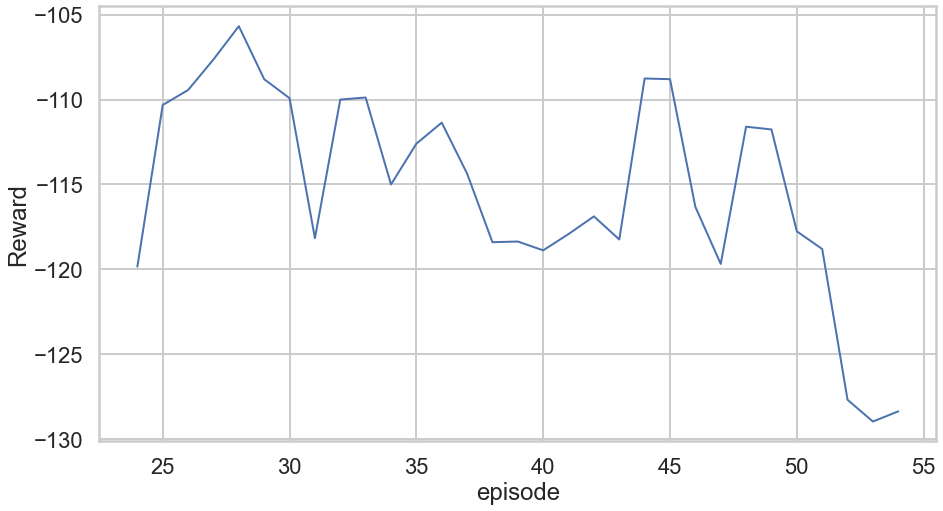

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)}, style='whitegrid')
sns.set_context("poster", rc={"lines.linewidth": 2}, font_scale=1)

df = pd.DataFrame(rewards, columns=['reward'])
df['reward_avg'] = df.transform(lambda x: x.rolling(25).mean())
df['episode'] = df.index
  
rewards_plot = sns.lineplot(x='episode', y='reward_avg', data=df, color="b")
# rewards_plot.set(ylim=(0, 1))
rewards_plot.set(ylabel="Reward")

# right_y = rewards_b_plot.axes.twinx()
# sns.lineplot(x='episode', y='acc_avg', data=eval_b, color="g", ax=right_y, ci='sd')
# plt.legend(loc='lower right', handles=[Line2D([], [], marker='_', color="b", label='Reward'), Line2D([], [], marker='_', color="g", label='Success ratio %')], facecolor='white')
# right_y.set(ylim=(lim*100 for lim in rewards_b_plot.get_ylim()))
# right_y.set(ylabel="Success ratio %")

# rewards_b_plot.set(xlabel="Episode")
# rewards_b_plot.set(xlim=(0, 1e6))
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
